## Decision trees

In [38]:
import numpy as np
import pandas as pd
from sklearn import tree

In [39]:
# Assuming that "glass_train.csv" and "glass_test.csv" are in the current directory
# Download the files from assignment 1 or 2

glass_train_df = pd.read_csv("glass_train.csv")
y = glass_train_df["CLASS"].values

glass_train_df.drop(["CLASS","ID"],axis="columns",inplace=True)
X = glass_train_df.values

dt = tree.DecisionTreeClassifier(max_depth=3)

dt.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [32]:
tree_desc = tree.export_text(dt, feature_names=list(glass_train_df.columns))
print(tree_desc)

|--- Ba <= 0.20
|   |--- Al <= 1.40
|   |   |--- Mg <= 3.34
|   |   |   |--- class: 2
|   |   |--- Mg >  3.34
|   |   |   |--- class: 1
|   |--- Al >  1.40
|   |   |--- Mg <= 2.64
|   |   |   |--- class: 5
|   |   |--- Mg >  2.64
|   |   |   |--- class: 2
|--- Ba >  0.20
|   |--- Mg <= 3.39
|   |   |--- Ca <= 11.38
|   |   |   |--- class: 7
|   |   |--- Ca >  11.38
|   |   |   |--- class: 2
|   |--- Mg >  3.39
|   |   |--- class: 1



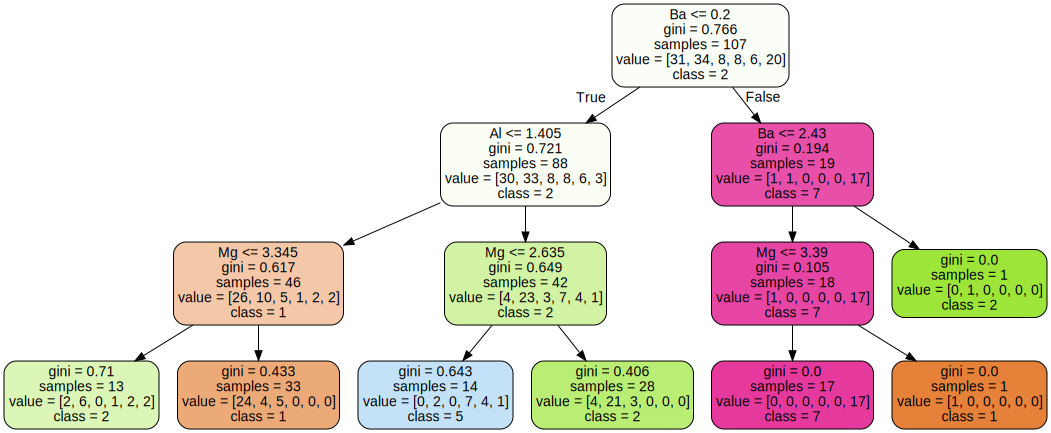

In [41]:
# Install graphviz first, e.g. with "conda install python-graphviz"

import graphviz
dot_data = tree.export_graphviz(dt, feature_names=list(glass_train_df.columns), 
                                class_names = [str(c) for c in dt.classes_], 
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
display(graph)

In [42]:
glass_test_df = pd.read_csv("glass_test.csv")
test_y = glass_test_df["CLASS"].values
test_X = glass_test_df.drop(["CLASS","ID"],axis="columns").values

predictions = dt.predict(test_X)
display(predictions)

print("Accuracy: {:.4f}".format(np.sum(test_y==predictions)/len(predictions)))

array([2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 7, 7, 1, 1, 1, 1, 1, 2, 1, 7, 7, 2,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 2, 2, 2, 2,
       7, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 7, 7, 1, 1, 1, 2,
       1, 7, 5, 5, 2, 2, 2, 2, 2, 2, 1, 1, 7, 2, 5, 1, 1, 1, 1, 1, 2, 2,
       2, 7, 1, 1, 5, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 2, 1, 2, 2])

Accuracy: 0.6636


In [35]:
predictions = dt.predict_proba(test_X)

df = pd.DataFrame(predictions,columns=dt.classes_)
display(df)

,1,2,3,5,6,7
0,0.142857,0.750000,0.107143,0.000000,0.000000,0.000000
1,0.153846,0.461538,0.000000,0.076923,0.153846,0.153846
2,0.727273,0.121212,0.151515,0.000000,0.000000,0.000000
3,0.727273,0.121212,0.151515,0.000000,0.000000,0.000000
4,0.142857,0.750000,0.107143,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
102,0.142857,0.750000,0.107143,0.000000,0.000000,0.000000
103,0.142857,0.750000,0.107143,0.000000,0.000000,0.000000
104,0.727273,0.121212,0.151515,0.000000,0.000000,0.000000
105,0.153846,0.461538,0.000000,0.076923,0.153846,0.153846
